<center><h1>Gunadi_Eben_HW8</h1></center>

Name: Eben Gunadi
<br>
Github Username: egunadi
<br>
USC ID: 3976793880

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [14]:
wdbc_filepath = '../data/wdbc.csv'

wdbc_header = ['id', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness', 'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry', 'se_fractal_dimension', 'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area', 'worst_smoothness', 'worst_compactness', 'worst_concavity', 'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']


wdbc_df = pd.read_csv(wdbc_filepath, names=wdbc_header, index_col='id', delimiter=',', encoding='utf-8')

In [15]:
wdbc_df.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
wdbc_df.shape

(569, 31)

### (b) Monte-Carlo Simulation

Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positive and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

#### (i) Supervised Learning

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

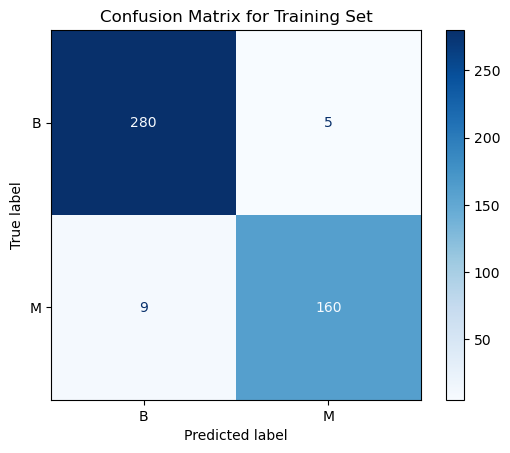

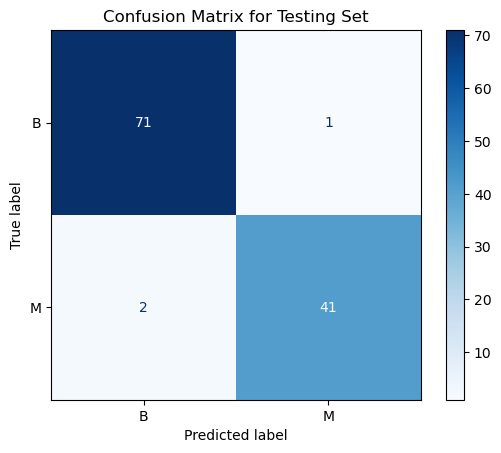

/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ebengunadi/anaconda3/envs/dsci552-hw8/lib/python3.9/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

In [22]:
# Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs

# Drop the diagnosis column
X = wdbc_df.drop('diagnosis', axis=1)
y = wdbc_df['diagnosis']

# Convert the diagnosis column to binary
y = y.map({'M': 1, 'B': 0})

# Repeat the experiment M = 30 times
M = 30

train_accuracy_list = []
train_precision_list = []
train_recall_list = []
train_f1_score_list = []
train_auc_list = []

test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_score_list = []
test_auc_list = []

for i in range(M):
    # Split the data into training and testing sets, using 20% of both the positive and negative classes for testing
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X[y == 1], y[y == 1], test_size=0.2, random_state=i)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X[y == 0], y[y == 0], test_size=0.2, random_state=i)

    X_train = pd.concat([X_train_pos, X_train_neg])
    X_test = pd.concat([X_test_pos, X_test_neg])
    y_train = pd.concat([y_train_pos, y_train_neg])
    y_test = pd.concat([y_test_pos, y_test_neg])

    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train an L1-penalized SVM to classify the data
    svm = LinearSVC(penalty='l1', dual=False)

    # Create a parameter grid for GridSearchCV
    param_grid = {'C': np.logspace(-4, 4, 9)}

    # Perform GridSearchCV with SVM and parameter grid to
    # determine weights of the SVM penalty (C)
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best parameters from GridSearchCV
    best_params = grid_search.best_params_

    # Train the L1-penalized SVM with the best parameters
    best_svm = LinearSVC(penalty='l1', dual=False, C=best_params['C'])
    best_svm.fit(X_train, y_train)

    # Make predictions on training and testing sets
    y_train_pred = best_svm.predict(X_train)
    y_test_pred = best_svm.predict(X_test)

    # Calculate the accuracy, precision, recall, F1-score, and AUC for the training and testing sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1_score = f1_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_pred)

    train_accuracy_list.append(train_accuracy)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1_score_list.append(train_f1_score)
    train_auc_list.append(train_auc)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1_score = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)

    test_accuracy_list.append(test_accuracy)
    test_precision_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_f1_score_list.append(test_f1_score)
    test_auc_list.append(test_auc)

    # Plot the ROC and report the confusion matrix for training and testing in one of the runs
    if i == 0:
        # Create a ConfusionMatrixDisplay from predictions
        cm_display_train = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, display_labels=['B', 'M'], cmap='Blues') 
        
        plt.title('Confusion Matrix for Training Set')
        plt.show()
        
        cm_display_test = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['B', 'M'], cmap='Blues')

        plt.title('Confusion Matrix for Testing Set')
        plt.show()
        
        # Calculate probabilities for ROC curve
        y_train_prob = best_svm.decision_function(X_train)
        y_test_prob = best_svm.decision_function(X_test)

        # Calculate the ROC curve and AUC
        fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

        roc_auc_train = auc(fpr_train, tpr_train)
        roc_auc_test = auc(fpr_test, tpr_test)

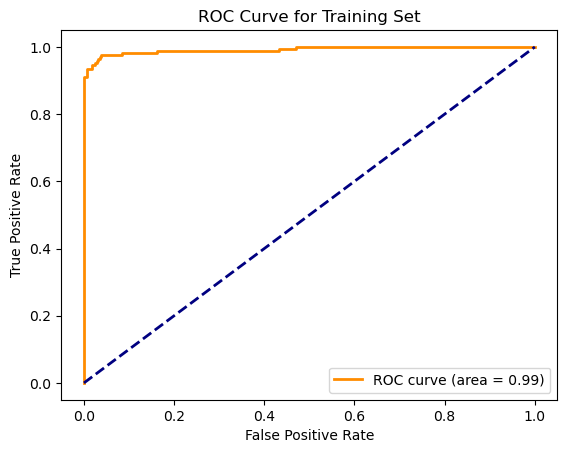

In [23]:
plt.figure()
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set')
plt.legend(loc='lower right')
plt.show()

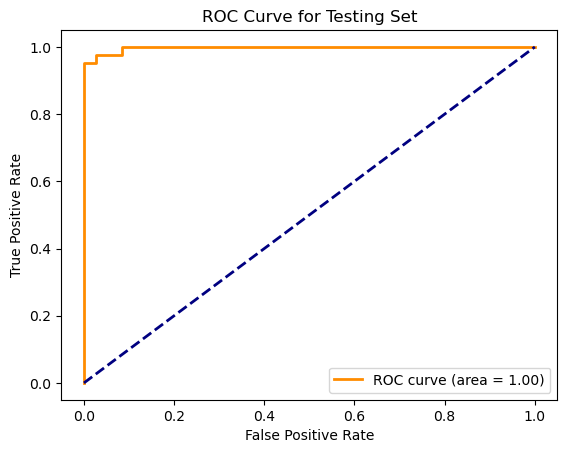

In [24]:
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Set')
plt.legend(loc='lower right')
plt.show()

In [25]:
# Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs

train_accuracy_avg = np.mean(train_accuracy_list)
train_precision_avg = np.mean(train_precision_list)
train_recall_avg = np.mean(train_recall_list)
train_f1_score_avg = np.mean(train_f1_score_list)
train_auc_avg = np.mean(train_auc_list)

test_accuracy_avg = np.mean(test_accuracy_list)
test_precision_avg = np.mean(test_precision_list)
test_recall_avg = np.mean(test_recall_list)
test_f1_score_avg = np.mean(test_f1_score_list)
test_auc_avg = np.mean(test_auc_list)

print('Training Set:')
print(f'Average Accuracy: {train_accuracy_avg:.4f}')
print(f'Average Precision: {train_precision_avg:.4f}')
print(f'Average Recall: {train_recall_avg:.4f}')
print(f'Average F1-Score: {train_f1_score_avg:.4f}')
print(f'Average AUC: {train_auc_avg:.4f}')

print('\nTesting Set:')
print(f'Average Accuracy: {test_accuracy_avg:.4f}')
print(f'Average Precision: {test_precision_avg:.4f}')
print(f'Average Recall: {test_recall_avg:.4f}')
print(f'Average F1-Score: {test_f1_score_avg:.4f}')
print(f'Average AUC: {test_auc_avg:.4f}')


Training Set:
Average Accuracy: 0.9852
Average Precision: 0.9901
Average Recall: 0.9698
Average F1-Score: 0.9799
Average AUC: 0.9820

Testing Set:
Average Accuracy: 0.9728
Average Precision: 0.9783
Average Recall: 0.9488
Average F1-Score: 0.9626
Average AUC: 0.9679


#### (ii) Semi-Supervised Learning/ Self-training

##### (A)

##### (B)

#### (iii) Unsupervised Learning

##### (A)

##### (B)

#### (iv) Spectral Clustering

#### (iv) Compare

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

#### (ii) Active

### (c) Average the 50 test errors

## References and Citations
